## **Description**

Analyze a **Markov Chain** that models an epidemic.  You will find the steady state solution two ways, by calculation and by eigenvectors.  Also you will compare the short term behavior to the long term behavior.

Let's imagine a future where there are three colonies on the moon:  **Artemis**, **Luna**, **Selene**

The probability vector gives the probability of disease in each of the three colonies.  

$\begin{pmatrix}0.5 \\ 0.2 \\ 0.7 \end{pmatrix}$ means that in Artemis the probability is 0.5, in Luna the probability is 0.2, on Selene the probability is 0.7

The transition matrix determines how the probabilities change every day.

Go to this cloud page to find your transition matrix A and the number n which you need for question 2.

In [83]:
import numpy as np
import matplotlib.pyplot as plt

## **1)**

Use the powering trick to compute  $X_2=A^2$ , $X_4=A^4$ , $X_8=A^8$ ,  $X_{16}=A^{16}$ ,  $X_{32}=A^{32}$ , and $X_{64}=A^{64}$.   It is recommended to use technology for the dot product (for this step just use ordinary matrix multiplication with technology, do not use MatrixPower).  Don't use more than six matrix multiplications.

***NOTE:*** Each vector is represented as a 1-D array within the matrix. Hence the rows and columns are visually flipped. This is done s.t. we have consistency when we execute our dot products. 

In [84]:
A = [[0.97, 0.03, 0], [0, 0.93, 0.07], [0.07, 0, 0.93]]
A = np.array([np.array(x) for x in A])
print(A)

[[0.97 0.03 0.  ]
 [0.   0.93 0.07]
 [0.07 0.   0.93]]


In [85]:
X_2 = A.dot(A)
print(X_2)

[[0.9409 0.057  0.0021]
 [0.0049 0.8649 0.1302]
 [0.133  0.0021 0.8649]]


In [86]:
X_4 = X_2.dot(X_2)
print(X_4)

[[0.88585141 0.10293501 0.01121358]
 [0.02616502 0.74860473 0.22523025]
 [0.24018169 0.01121358 0.74860473]]


In [87]:
X_8 = X_4.dot(X_4)
print(X_8)

[[0.79011931 0.1683685  0.04151218]
 [0.09686176 0.56562798 0.33751026]
 [0.39285984 0.04151218 0.56562798]]


In [88]:
X_16 = X_8.dot(X_8)
print(X_16)

[[0.65690547 0.2299884  0.11310613]
 [0.2639143  0.35025426 0.38583144]
 [0.53663961 0.11310613 0.35025426]]


In [89]:
X_32 = X_16.dot(X_16)
print(X_32)

[[0.55291925 0.24442806 0.20265269]
 [0.47285629 0.22701518 0.30012854]
 [0.57033213 0.20265269 0.22701518]]


In [91]:
X_64 = X_32.dot(X_32)
print(X_64)

[[0.53687838 0.23170597 0.23141565]
 [0.53996984 0.22793709 0.23209307]
 [0.54064726 0.23141565 0.22793709]]


### Describe how close these matrices are each other.  Try to give a numerical measure of closeness.

The initial matrices, $A$ & $X_2$ are very close to each other. But as we continuously dot matrices with themselves, the further we get from $A$ and every other matrix within our "series" of matrices.

However, eventually our matrices start to converge, hence the differences between matrix $X_{32}$ & $X_{64}$ is far more miniscule than the difference between $A$ & $X_2$

The greatest difference we observe is between matrices $X_4$ and $X_8$.

Shown below is the evolution of the difference between each matrix.

In [105]:
print('Difference between A & X2: {}'.format(np.linalg.norm(X_2) - np.linalg.norm(A)))
print('Difference between X2 & X4: {}'.format(np.linalg.norm(X_4) - np.linalg.norm(X_2)))
print('Difference between X4 & X8: {}'.format(np.linalg.norm(X_8) - np.linalg.norm(X_4)))
print('Difference between X8 & X16: {}'.format(np.linalg.norm(X_16) - np.linalg.norm(X_8)))
print('Difference between X16 & X32: {}'.format(np.linalg.norm(X_32) - np.linalg.norm(X_16)))
print('Difference between X32 & X64: {}'.format(np.linalg.norm(X_64) - np.linalg.norm(X_32)))

Difference between A & X2: -0.08208184506212857
Difference between X2 & X4: -0.1322161807759772
Difference between X4 & X8: -0.16877300378268822
Difference between X8 & X16: -0.1311015183672224
Difference between X16 & X32: -0.03262772791063617
Difference between X32 & X64: 0.0004837359262186425


## **2)**

Use A, X2, X4, X8, and X16 to compute An where n is given on the cloud page, using the second part of the powering trick.

**n = 22**

22 can be broken into summation of {1,2,4,8,16,32,64}

22 = 16 + 4 + 2

Hence we will multiply $X_{16}, X_4, X_2$ together to produce $X_{22}$

In [92]:
X_22 = X_16.dot(X_4.dot(X_2))
print(X_22)

[[0.59906333 0.24385347 0.1570832 ]
 [0.36652747 0.27392537 0.35954715]
 [0.56899142 0.1570832  0.27392537]]


## **3)**

On $day=0$, the initial probabilities for the disease is $\begin{pmatrix} 0.5\\ 0 \\ 0 \end{pmatrix}$ because the disease originated in Artemis.

### **a)**

Calculate the disease probabilities for the first 3 days after $day=0$.  Make a timeseries plot.

In [93]:
day0 = np.array([0.5, 0, 0])
day1 = A.dot(day0)
day2 = X_2.dot(day0)
day3 = A.dot(day2)

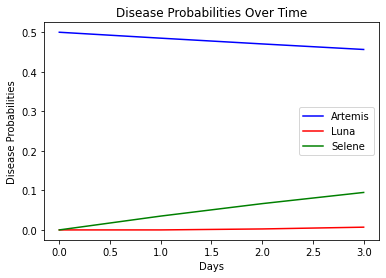

In [94]:
artemis = [day0[0], day1[0], day2[0], day3[0]]
luna = [day0[1], day1[1], day2[1], day3[1]]
selene = [day0[2], day1[2], day2[2], day3[2]]
days = [0, 1,2,3]
fig, axis = plt.subplots()
axis.plot(days, artemis, '-b', label='Artemis')
axis.plot(days, luna, '-r', label='Luna')
axis.plot(days, selene, '-g', label='Selene')
axis.set_xlabel('Days')
axis.set_ylabel('Disease Probabilities')
axis.set_title('Disease Probabilities Over Time')
axis.legend(loc='center right', frameon=True)

### **b)**

Calculate the disease probabilities for $day=n$ using your result for $A^n$

**n = 22**

In [95]:
day22 = X_22.dot(day0)
print(day22)

[0.29953167 0.18326374 0.28449571]


### **c)**

Calculate the dominant eigenvector v for A (It is recommended to use technology, but since it is 3x3 this is feasible by hand.  Much easier with technology.)  Give your answer as a probability vector.

In [96]:
eig_vals, eig_vecs = np.linalg.eig(A)
print(eig_vals)
print('------------------------------')
print(eig_vecs)

[1.   +0.j         0.915+0.04330127j 0.915-0.04330127j]
------------------------------
[[ 0.57735027+0.j          0.26519929+0.20879029j  0.26519929-0.20879029j]
 [ 0.57735027+0.j         -0.78756153+0.j         -0.78756153-0.j        ]
 [ 0.57735027+0.j          0.16876319-0.48717735j  0.16876319+0.48717735j]]


In [97]:
dominant_eig_vec = eig_vecs[:,0].real
print('Dominant Eigenvector is: {}'.format(dominant_eig_vec))

Dominant Eigenvector is: [0.57735027 0.57735027 0.57735027]


### **d)**

Compare (3a)+(3b)+(3c). Explain similarities and differences.  Are any of these truly equal?

In [98]:
print('day 0: {}'.format(day0))
print('day 1: {}'.format(day1))
print('day 2: {}'.format(day2))
print('day 3: {}'.format(day3))
print('day 22: {}'.format(day22))
print('Dominant Eigenvector: {}'.format(dominant_eig_vec))

day 0: [0.5 0.  0. ]
day 1: [0.485 0.    0.035]
day 2: [0.47045 0.00245 0.0665 ]
day 3: [0.45641   0.0069335 0.0947765]
day 22: [0.29953167 0.18326374 0.28449571]
Dominant Eigenvector: [0.57735027 0.57735027 0.57735027]


The first 3 day vectors, day 0 through day 3, are very similar. As we transition from state to state, the probability of disease in colony Artemis subsides as the probability of disease in colonies Selene and Luna increase.

The more we transition away from day 0 via our transition matrix A, the less similar we are to the earlier vectors. Hence, day1 vector and day22 vectors are not similar as we have transitioned greatly over that time period.

Shown below is the evolution of the transitions up until day 22. Each time/day slice is the vector hence, we are seeing the evolution of the components.

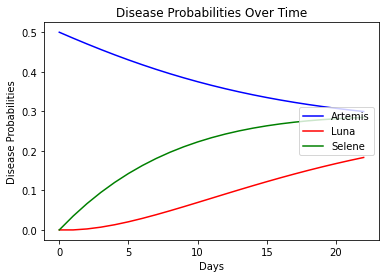

In [102]:
days = [x for x in range(23)]
artemis = []
luna = []
selene = []
dayt = day0.copy()
for day in days:
  artemis.append(dayt[0])
  luna.append(dayt[1])
  selene.append(dayt[2])
  dayt = A.dot(dayt)

fig, axis = plt.subplots()
axis.plot(days, artemis, '-b', label='Artemis')
axis.plot(days, luna, '-r', label='Luna')
axis.plot(days, selene, '-g', label='Selene')
axis.set_xlabel('Days')
axis.set_ylabel('Disease Probabilities')
axis.set_title('Disease Probabilities Over Time')
axis.legend(loc='center right', frameon=True)

Hence, we can say that the first few vectors, day 0-3, are relatively similar, but as we get further into our transitions we start to converge to a different vector that is not similar to them. The day 22 vector is wildly different as compared to the day 0-3 vectors.

By effect, we know that the transition matrix A is pushing the probability vector to the dominant eigenvector. This is done as we continuously multiply the transition matrix to the original probability vector.

### **e)**

Write the 3x3 matrix where each column is the vector from (3c).

In [103]:
vec1 = eig_vecs[:,0]
vec2 = eig_vecs[:,1]
vec3 = eig_vecs[:,2]
equiv_mtrx = np.array([vec1, vec2, vec3])
print(equiv_mtrx)

[[ 0.57735027+0.j          0.57735027+0.j          0.57735027+0.j        ]
 [ 0.26519929+0.20879029j -0.78756153+0.j          0.16876319-0.48717735j]
 [ 0.26519929-0.20879029j -0.78756153-0.j          0.16876319+0.48717735j]]


### **f)**

Compare the result in (3e) with A64 and explain any similarities or differences. 

In [109]:
np.linalg.norm(equiv_mtrx) - np.linalg.norm(X_64)

0.6408692559393696

The difference between the eigenvector matrix and the $X_{64}$ matrix are larger than the differences between any other matrix we observed earlier. 

## **4)**

What is your long term prediction?  Explain in terms of your results in question (3).

My long term prediction is that eventually the Transition Matrix will converge to the eigenvalue matrix and that eventually the disease vector will converge to the dominant eigenvector of our Transition Matrix.

We can see from our graph in 3d that there is convergence happening for the disease vector to our dominant eigen vector.

By observing that math we are conducting, it is also clear that when we multiply our transition matrix to itself thousands of times, the matrix itself is converging to the eigenmatrix produced. Hence over time we will see convergence of our transition matrix to our eigenmatrix.